In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

[3 1 2]


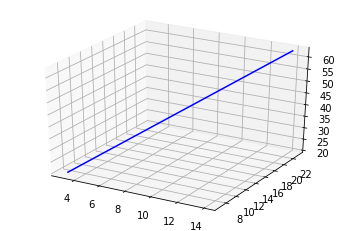

In [2]:
# create random line
np.random.seed(3)
beta = np.random.randint(1,6,(3,))
print(beta)
X = np.linspace([1, 3, 7],[1, 14, 23],100)
y = X @ beta

# plot line
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot(X[:,1],X[:,2],y,color="blue")

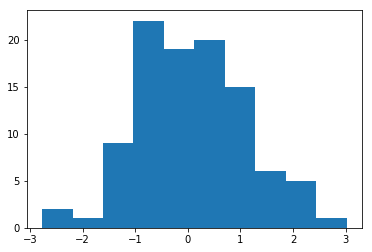

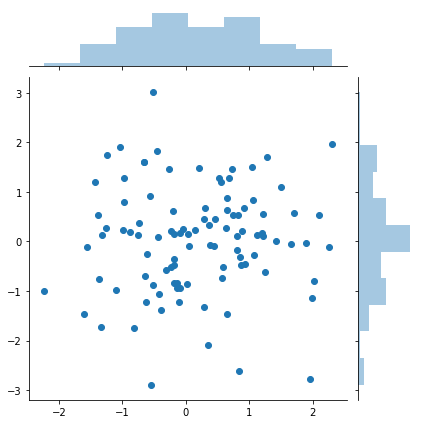

In [87]:
# create noise
mu, sigma = 0, 1 # mean and standard deviation
noise_y = np.random.normal(mu, sigma, 100)
noise_X = np.random.normal(mu, sigma, (100, 2))

# plot noise
plt.hist(noise)
sns.jointplot(noise_X[:,0], noise_X[:,1])

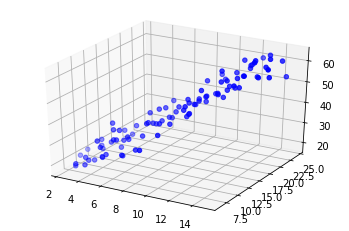

In [90]:
# add noise to y
y_noise = y + noise_y

# add noise to X
X_noise = X.copy()
X_noise[:,(1,2)] = X[:,(1,2)] + noise_X

# plot y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X_noise[:,1],X_noise[:,2],y_noise,color="blue")

In [91]:
# estimate beta in order to minimize the square errors
beta_ = np.linalg.inv(X_noise.T @ X_noise) @ X_noise.T @ y_noise
print(beta_)

[3.91860456 1.30360757 1.74936219]


In [95]:
# estimate y given beta_
y_ = X @ beta_

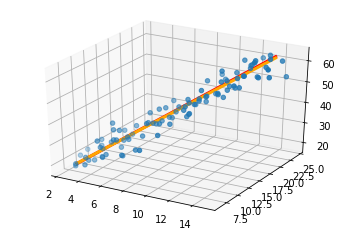

In [96]:
# compare y, y_ and y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(X_noise[:,1],X_noise[:,2],y_noise)
ax1.plot(X[:,1],X[:,2],y,color="red", lw=3)
ax1.plot(X[:,1],X[:,2],y_,color="orange", lw=3)

[3.91860456 1.30360757 1.74936219]


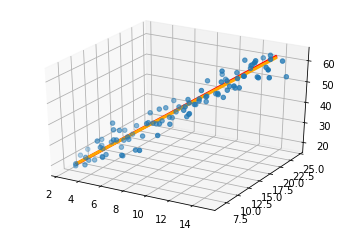

In [99]:
# with numpy built-in function
beta_np = np.linalg.lstsq(X_noise, y_noise, rcond=None)[0]
print(beta_np)
# compare y, y_ and y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(X_noise[:,1],X_noise[:,2],y_noise)
ax1.plot(X[:,1],X[:,2],y,color="red", lw=3)
ax1.plot(X[:,1],X[:,2],X @ beta_np,color="orange", lw=3)

0.0
[4.26903956 1.3583828  1.69418747]


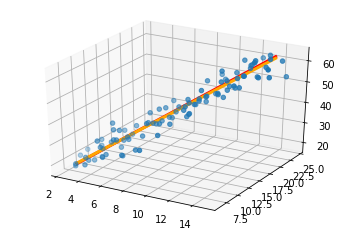

In [100]:
from sklearn import linear_model
# with sklearn built-in function
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_noise, y)

print(lin_mod.intercept_)
print(lin_mod.coef_)
# compare y, y_ and y_noise
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(X_noise[:,1],X_noise[:,2],y_noise)
ax1.plot(X[:,1],X[:,2],y,color="red", lw=3)
ax1.plot(X[:,1],X[:,2],X @ lin_mod.coef_,color="orange", lw=3)